In [1]:
#General imports.

%matplotlib inline
import mpld3
mpld3.enable_notebook()
import matplotlib.pyplot as plt
import matplotlib 

import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

#import seaborn as sns
#sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'

Welcome to JupyROOT 6.12/06


In [2]:
f = open("output.txt")

In [3]:
float('inf')

inf

In [4]:
import csv
vec = []


#with open('output_v9_15_g2nearline1_run17969_00071.txt') as csv_file:
with open('output_v9_15_g2nearline1_run17969_00071_fixedIncludes.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=' ')
    line_count = 0
    for row in csv_reader:
        vec.append([float(x) for x in row])

In [5]:
print(row)

['23', '53', '1099.31', '1589.44', '1.44585']


In [6]:
calos, xtals, means, refs, ratios = zip(*vec)

In [7]:
xtalNumGlobal = [calos[i]*54 + xtals[i] for i in range(len(xtals))]

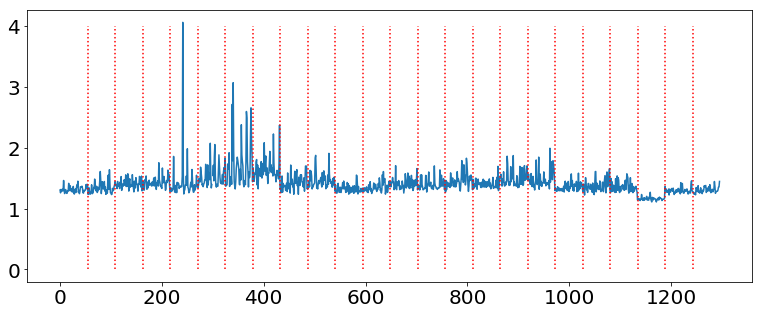

In [11]:
fig, ax = plt.subplots(figsize=(13,5))
plt.plot(xtalNumGlobal, ratios)
for i in range(1,24):
    plt.plot([i*54,i*54],[0,4],'r:')
plt.show()

In [67]:
from io import StringIO
import urllib.request
import ast

truevec = []
lastsubrunvec = []
ratios_fromDB = []

runNum = 17969

for i in range(1,25):
    ding = urllib.request.urlopen("http://dbdata0vm.fnal.gov:9091/QE/gm2/dev/app/SQ/query?dbname=postgres_dev&t=nearline_sync_energy_constants&w=validfromrun:lt:"+str(runNum + 1)+"&w=calonum:"+str(i)+"&o=-validfromrun&l=1")
    ding = ding.read()
    
    f = StringIO(str(ding))
    reader = csv.reader(f, delimiter=',')
    for item in reader:
        print(item[-1:])
        print(item[10])
        list_db = ast.literal_eval(item[10])
        for ratio in list_db:
            #print(ratio)
            ratios_fromDB.append(ratio)

/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: ResourceWarning: unclosed file <_io.TextIOWrapper name='output.txt' mode='r' encoding='UTF-8'>
  from ipykernel import kernelapp as app


["71\\n'"]
[1.30408, 1.25835, 1.31482, 1.2918, 1.28785, 1.31674, 1.29215, 1.46139, 1.30646, 1.24596, 1.30531, 1.31317, 1.28908, 1.24889, 1.25501, 1.29424, 1.2887, 1.41446, 1.29476, 1.33678, 1.37601, 1.29183, 1.30605, 1.32657, 1.27064, 1.33054, 1.36415, 1.25534, 1.23836, 1.28286, 1.32156, 1.26207, 1.3318, 1.38842, 1.35824, 1.44984, 1.26756, 1.3009, 1.24437, 1.27998, 1.35847, 1.35532, 1.35221, 1.36761, 1.33564, 1.26152, 1.2532, 1.30129, 1.29095, 1.2989, 1.30694, 1.39384, 1.32824, 1.3995]
["71\\n'"]
[1.39394, 1.23168, 1.24404, 1.34, 1.25872, 1.23457, 1.26549, 1.27931, 1.39048, 1.24327, 1.25808, 1.25895, 1.34704, 1.32571, 1.48423, 1.40246, 1.33925, 1.28828, 1.36461, 1.26384, 1.28118, 1.34843, 1.3095, 1.32431, 1.45463, 1.60899, 1.44862, 1.24549, 1.33203, 1.44175, 1.33436, 1.32056, 1.35284, 1.44484, 1.28774, 1.35399, 1.23366, 1.30468, 1.24798, 1.26146, 1.53423, 1.55183, 1.31468, 1.63882, 1.40408, 1.25937, 1.25643, 1.22916, 1.23829, 1.33254, 1.29115, 1.29847, 1.35728, 1.38497]
["71\\n'"]
[1.4

In [104]:
ratios_new = []
for i,ratio in enumerate(ratios):
    if(ratio == float('inf')):
        print("hi")
        ratios_new.append(1)
    else:
        ratios_new.append(ratio)

hi
hi


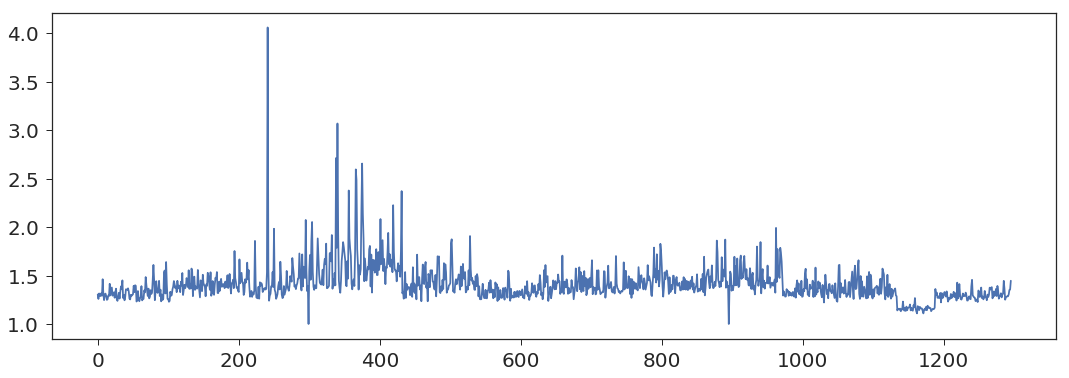

In [105]:
fig, ax = plt.subplots(figsize=(18,6))
plt.plot(ratios_new)
plt.show()

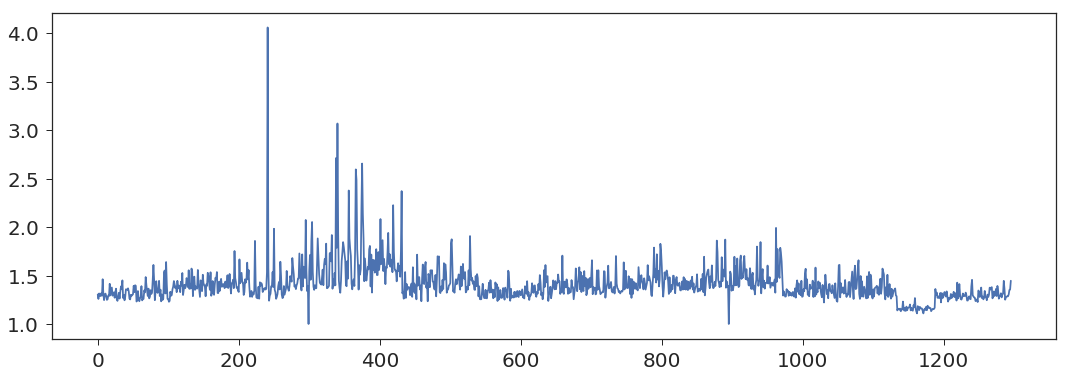

In [106]:
fig, ax = plt.subplots(figsize=(18,6))
plt.plot(ratios_fromDB)
plt.show()

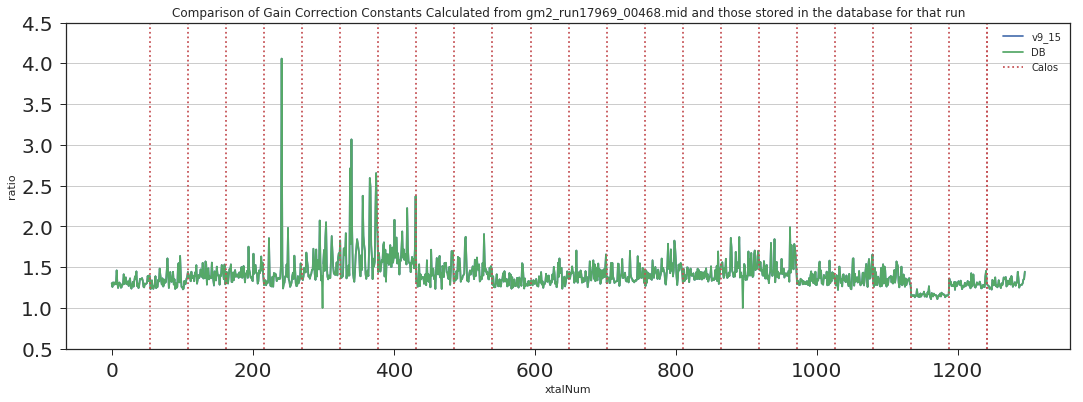

In [146]:
fig, ax = plt.subplots(figsize=(18,6))
plt.title('Comparison of Gain Correction Constants Calculated from gm2_run17969_00468.mid and those stored in the database for that run')
plt.xlabel('xtalNum')
plt.ylabel('ratio')
plt.plot(xtalNumGlobal, ratios, label='v9_15')
plt.plot(xtalNumGlobal, ratios_fromDB, label='DB')
for i in range(1,24):
    plt.plot([i*54,i*54],[0.5,5],'r:')
plt.plot([i*54,i*54],[0.5,5],'r:',label='Calos')
plt.ylim(0.5,4.5)
plt.legend()
ax.yaxis.grid()
plt.show()

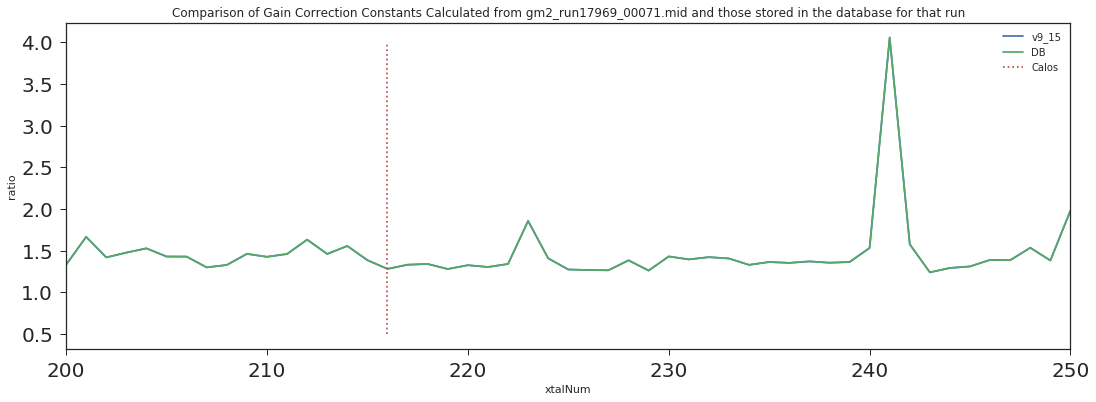

In [108]:
fig, ax = plt.subplots(figsize=(18,6))
plt.title('Comparison of Gain Correction Constants Calculated from gm2_run17969_00071.mid and those stored in the database for that run')
plt.xlabel('xtalNum')
plt.ylabel('ratio')
plt.plot(xtalNumGlobal, ratios, label='v9_15')
plt.plot(xtalNumGlobal, ratios_fromDB, label='DB')
for i in range(1,24):
    plt.plot([i*54,i*54],[0.5,4],'r:')
plt.plot([i*54,i*54],[0.5,4],'r:',label='Calos')

plt.xlim(200,250)

plt.legend()
plt.show()

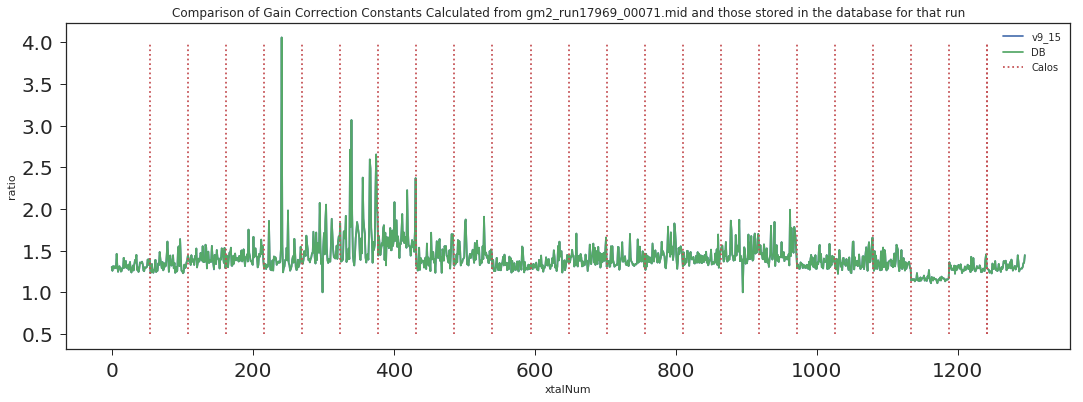

In [109]:
fig, ax = plt.subplots(figsize=(18,6))
plt.title('Comparison of Gain Correction Constants Calculated from gm2_run17969_00071.mid and those stored in the database for that run')
plt.xlabel('xtalNum')
plt.ylabel('ratio')
plt.plot(xtalNumGlobal, ratios_new, label='v9_15')
plt.plot(xtalNumGlobal, ratios_fromDB, label='DB')
for i in range(1,24):
    plt.plot([i*54,i*54],[0.5,4],'r:')
plt.plot([i*54,i*54],[0.5,4],'r:',label='Calos')
plt.legend()
plt.show()

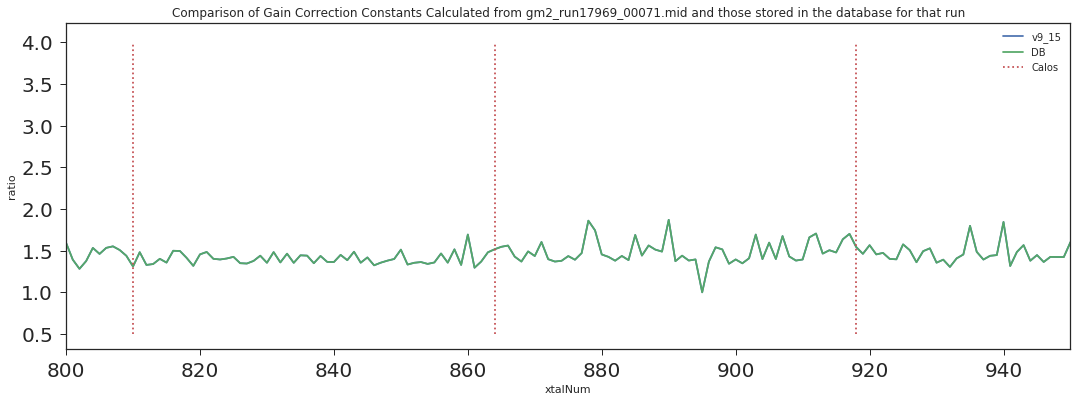

In [110]:
fig, ax = plt.subplots(figsize=(18,6))
plt.title('Comparison of Gain Correction Constants Calculated from gm2_run17969_00071.mid and those stored in the database for that run')
plt.xlabel('xtalNum')
plt.ylabel('ratio')
plt.plot(xtalNumGlobal, ratios_new, label='v9_15')
plt.plot(xtalNumGlobal, ratios_fromDB, label='DB')
for i in range(1,24):
    plt.plot([i*54,i*54],[0.5,4],'r:')
plt.plot([i*54,i*54],[0.5,4],'r:',label='Calos')
plt.legend()
plt.xlim(800,950)

plt.show()

In [111]:
ratio_percentdiff = [(ratios[i] - ratios_fromDB[i])/(ratios_fromDB[i])*100. for i in range(len(ratios))]

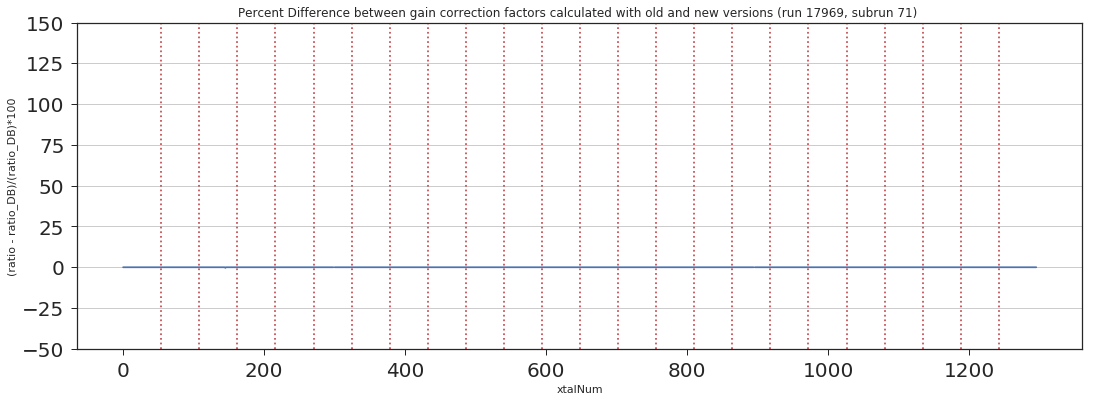

In [112]:
fig, ax = plt.subplots(figsize=(18,6))
plt.title('Percent Difference between gain correction factors calculated with old and new versions (run 17969, subrun 71) ')
plt.xlabel('xtalNum')
plt.ylabel('(ratio - ratio_DB)/(ratio_DB)*100')
plt.plot(xtalNumGlobal, ratio_percentdiff)
for i in range(1,24):
    plt.plot([i*54,i*54],[-50,150],'r:')
ax.yaxis.grid()
plt.ylim(-50,150)
plt.show()

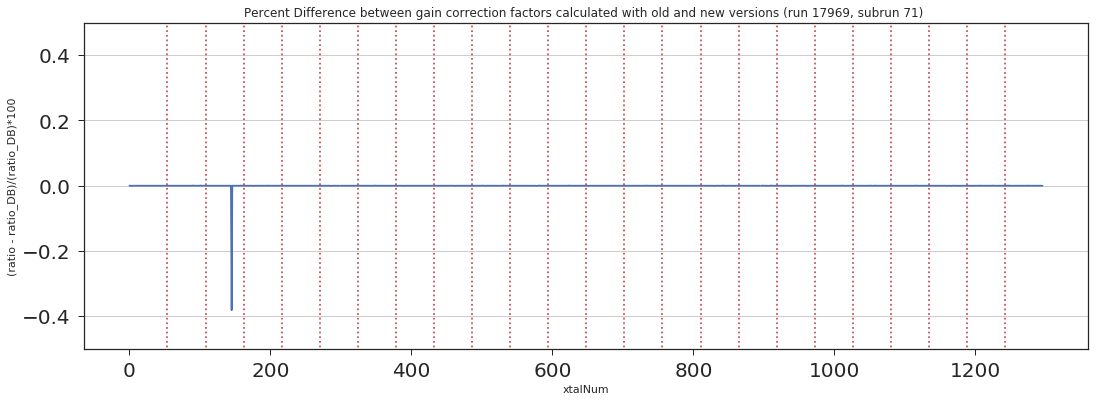

In [142]:
fig, ax = plt.subplots(figsize=(18,6))
plt.title('Percent Difference between gain correction factors calculated with old and new versions (run 17969, subrun 71) ')
plt.xlabel('xtalNum')
plt.ylabel('(ratio - ratio_DB)/(ratio_DB)*100')
plt.plot(xtalNumGlobal, ratio_percentdiff)
for i in range(1,24):
    plt.plot([i*54,i*54],[-50,150],'r:')
ax.yaxis.grid()
plt.ylim(-.50,.50)
plt.show()

In [113]:
ratio_diff = [(ratios[i] - ratios_fromDB[i]) for i in range(len(ratios))]

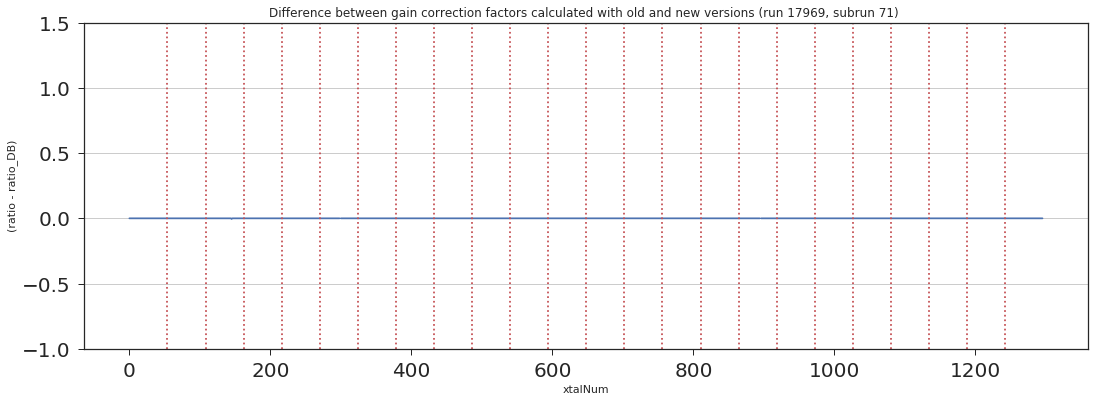

In [114]:
fig, ax = plt.subplots(figsize=(18,6))
plt.title('Difference between gain correction factors calculated with old and new versions (run 17969, subrun 71) ')
plt.xlabel('xtalNum')
plt.ylabel('(ratio - ratio_DB)')
plt.plot(xtalNumGlobal, ratio_diff)
for i in range(1,24):
    plt.plot([i*54,i*54],[-1,1.50],'r:')
ax.yaxis.grid()
plt.ylim(-1,1.5)
plt.show()

In [115]:
diffMeans = []
for i in range(24):
    diffMeans.append(np.mean(ratio_diff[i*54:(i+1)*54]))

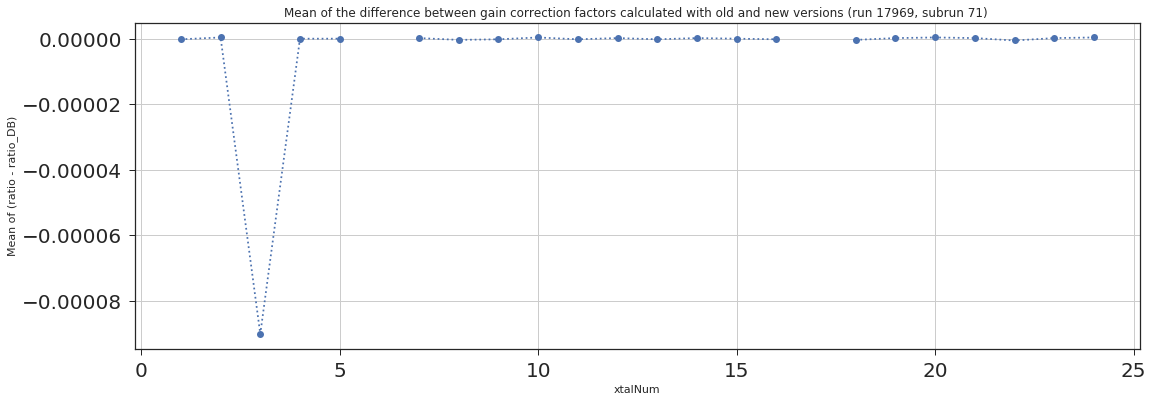

In [116]:
fig, ax = plt.subplots(figsize=(18,6))
plt.title('Mean of the difference between gain correction factors calculated with old and new versions (run 17969, subrun 71) ')
plt.xlabel('xtalNum')
plt.ylabel('Mean of (ratio - ratio_DB)')
plt.plot([x for x in range(1,25)], diffMeans,"o:")
plt.grid()
plt.show()

---

### Now lets start making plots to get to the bottom of this. Starting with adding the same output lines into v8_04 code

In [117]:
vec_v8_04 = []
with open('output_run17969_00071_v8_04_g2nearline2.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=' ')
    line_count = 0
    for row in csv_reader:
        vec_v8_04.append([float(x) for x in row])

In [118]:
print(row)

['23', '53', '1099.31', '1589.44', '1.44585']


In [119]:
calos8, xtals8, means8, refs8, ratios8 = zip(*vec_v8_04)

In [120]:
for i in range(10):
    print(refs8[i], round(means8[i]*ratios8[i],2))

1779.57 1779.57
1748.02 1748.02
1653.81 1653.81
1699.04 1699.04
1522.43 1522.42
1575.62 1575.62
1592.17 1592.17
1656.61 1656.62
1767.09 1767.08
1394.47 1394.47


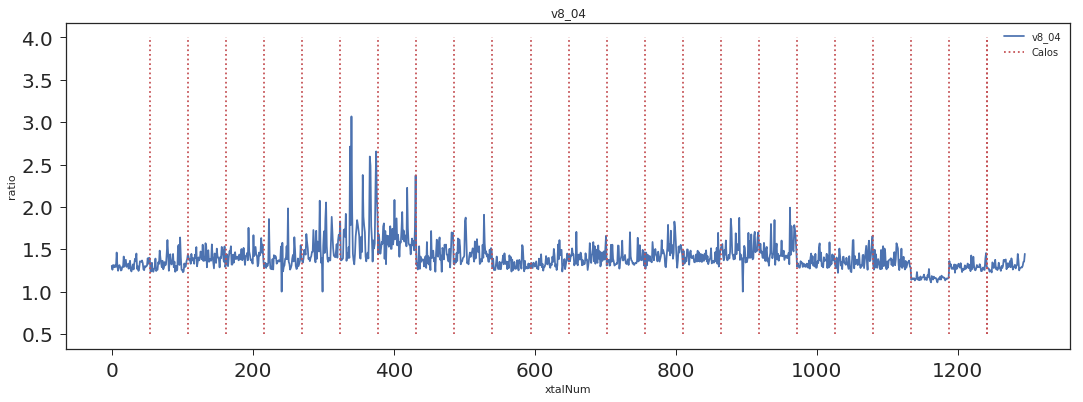

In [121]:
fig, ax = plt.subplots(figsize=(18,6))
plt.title('v8_04')
plt.xlabel('xtalNum')
plt.ylabel('ratio')
plt.plot(xtalNumGlobal, ratios8, label='v8_04')
for i in range(1,24):
    plt.plot([i*54,i*54],[0.5,4],'r:')
plt.plot([i*54,i*54],[0.5,4],'r:',label='Calos')
plt.legend()
plt.show()

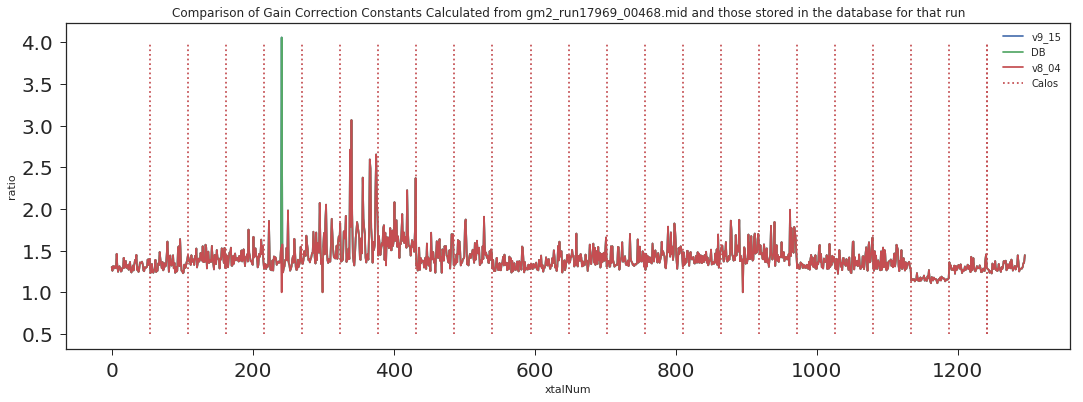

In [122]:
fig, ax = plt.subplots(figsize=(18,6))
plt.title('Comparison of Gain Correction Constants Calculated from gm2_run17969_00468.mid and those stored in the database for that run')
plt.xlabel('xtalNum')
plt.ylabel('ratio')
plt.plot(xtalNumGlobal, ratios, label='v9_15')
plt.plot(xtalNumGlobal, ratios_fromDB, label='DB')
plt.plot(xtalNumGlobal, ratios8, label='v8_04')
for i in range(1,24):
    plt.plot([i*54,i*54],[0.5,4],'r:')
plt.plot([i*54,i*54],[0.5,4],'r:',label='Calos')
plt.legend()
plt.show()

In [123]:
diffvec_8_db = [ratios_fromDB[i] - ratios8[i] for i in range(len(ratios_fromDB))]

In [124]:
for i, x in enumerate(diffvec_8_db):
    if(np.abs(x) > 0.01):
        print(i, x)
        print("    ", ratios_fromDB[i], ratios8[i])
        print("    ", i%54, np.floor(i/54))

241 3.0587299999999997
     4.05873 1.0
     25 4.0


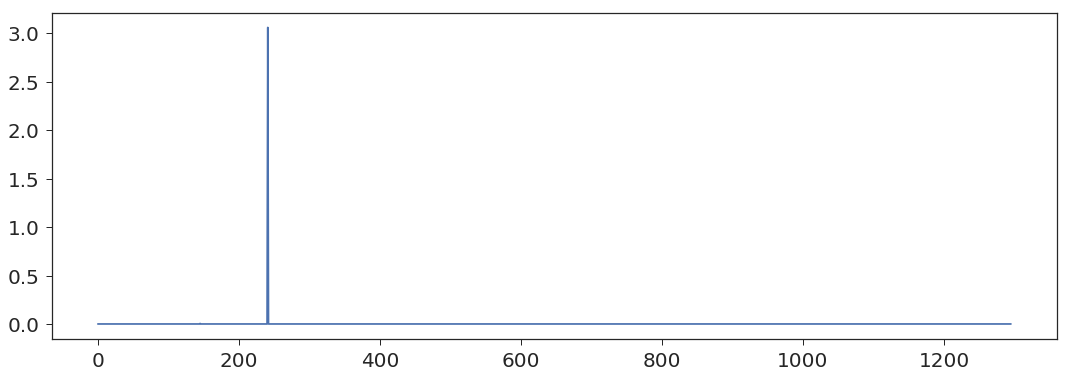

In [125]:
fig, ax = plt.subplots(figsize=(18,6))
plt.plot(diffvec_8_db)
plt.show()

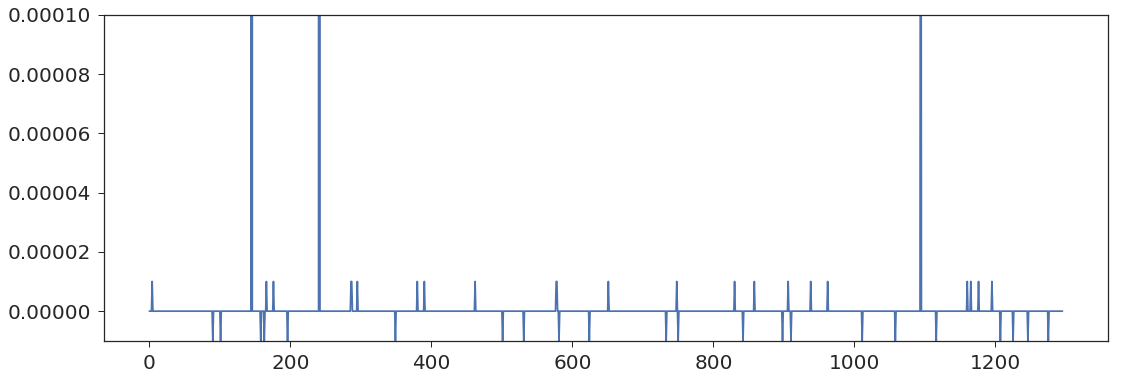

In [126]:
fig, ax = plt.subplots(figsize=(18,6))
plt.plot(diffvec_8_db)
plt.ylim(-0.00001,0.0001)
plt.show()

---

### Ok, so the ratios are the same as the database, let's see how the means compare from version to version.

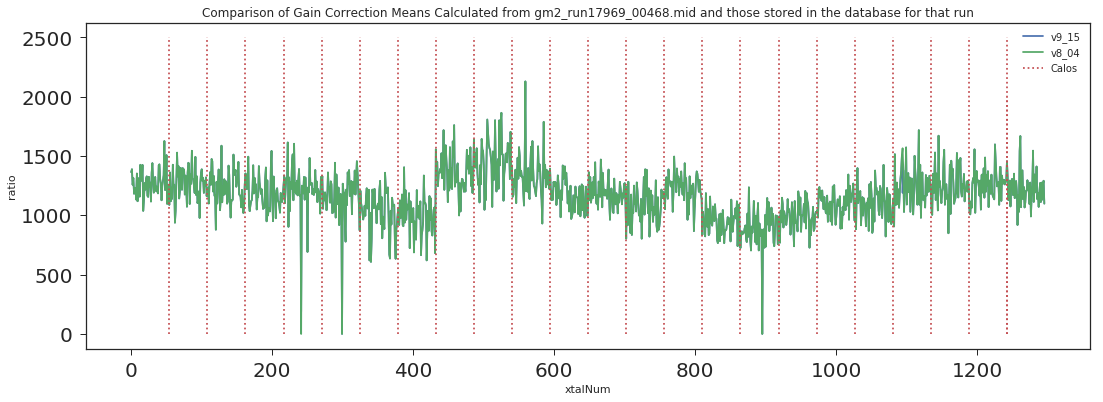

In [127]:
fig, ax = plt.subplots(figsize=(18,6))
plt.title('Comparison of Gain Correction Means Calculated from gm2_run17969_00468.mid and those stored in the database for that run')
plt.xlabel('xtalNum')
plt.ylabel('ratio')
plt.plot(xtalNumGlobal, means, label='v9_15')
plt.plot(xtalNumGlobal, means8, label='v8_04')
for i in range(1,24):
    plt.plot([i*54,i*54],[0.5,2500],'r:')
plt.plot([i*54,i*54],[0.5,2000],'r:',label='Calos')
plt.legend()
plt.show()

In [128]:
diffmeans = [means[i] - means8[i] for i in range(len(means))]
percentdiffmeans = []
for i, mean in enumerate(means8):
    if(mean > 0):
        pdm = (means[i] - means8[i])/(means8[i])*100. 
        if(not(mean == means[i])):
            print(i, pdm, mean, means[i])
    else:
        pdm = 0.00
    percentdiffmeans.append(pdm)

1051 -0.00011734059280190011 852.22 852.219
1094 -24.015758086554552 1566.18 1190.05


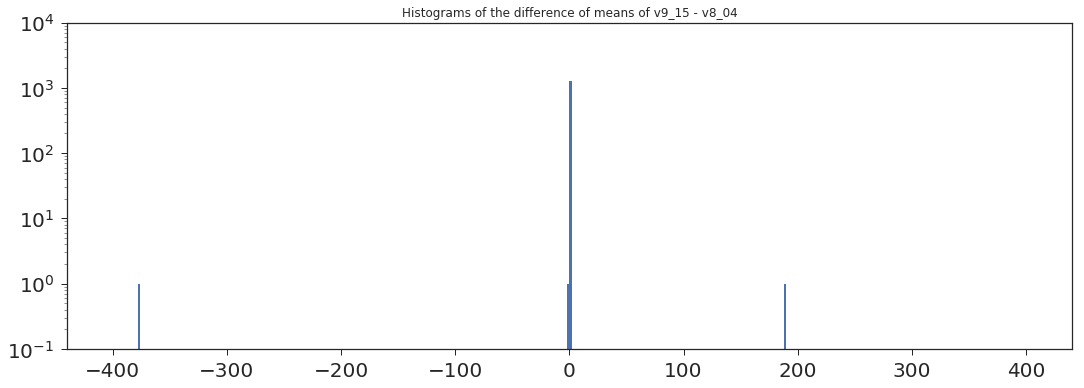

In [129]:
fig,ax = plt.subplots(figsize=(18,6))
plt.title("Histograms of the difference of means of v9_15 - v8_04")
plt.hist(diffmeans,range=(-400,400),bins=400)
plt.yscale('log')
plt.ylim(0.1,10000)
plt.show()

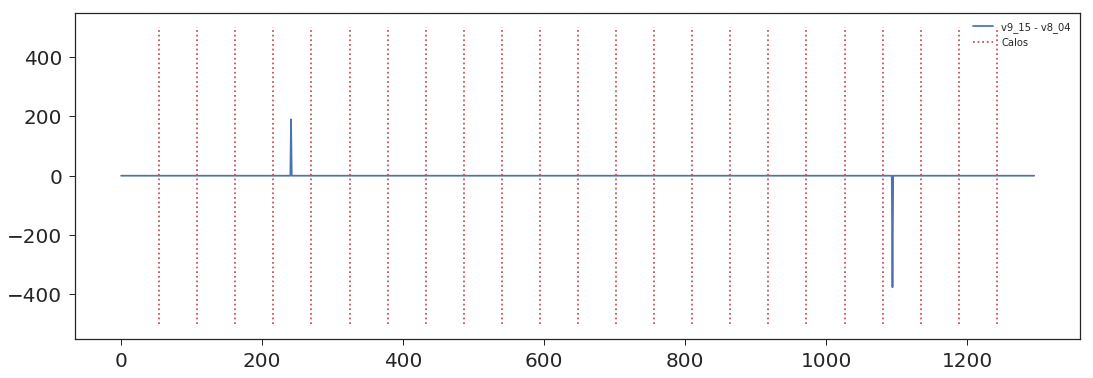

In [130]:
fig, ax = plt.subplots(figsize=(18,6))
plt.plot(xtalNumGlobal, diffmeans, label='v9_15 - v8_04')
for i in range(1,24):
    plt.plot([i*54,i*54],[-500,500],'r:')
plt.plot([i*54,i*54],[0.5,.50],'r:',label='Calos')
plt.legend()
plt.show()

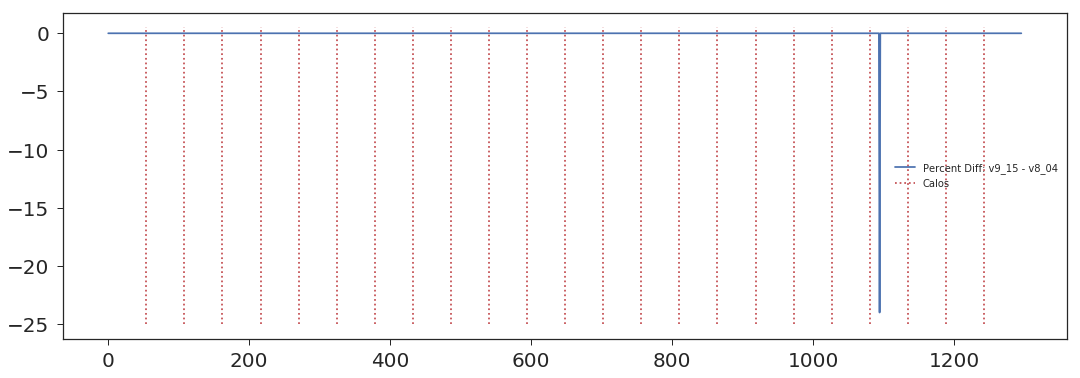

In [131]:
fig, ax = plt.subplots(figsize=(18,6))
plt.plot(xtalNumGlobal, percentdiffmeans, label='Percent Diff: v9_15 - v8_04')
for i in range(1,24):
    plt.plot([i*54,i*54],[-25,0.5],'r:')
plt.plot([i*54,i*54],[0.5,.50],'r:',label='Calos')
plt.legend()
plt.show()

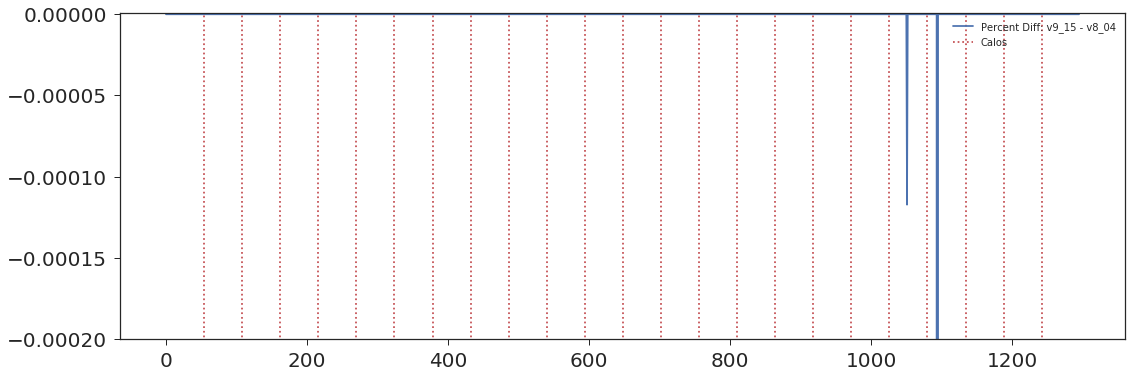

In [132]:
fig, ax = plt.subplots(figsize=(18,6))
plt.plot(xtalNumGlobal, percentdiffmeans, label='Percent Diff: v9_15 - v8_04')
for i in range(1,24):
    plt.plot([i*54,i*54],[-5,5],'r:')
plt.plot([i*54,i*54],[0.5,.50],'r:',label='Calos')
plt.legend()
plt.ylim(-0.0002,0.000001)
plt.show()

---

### Now lets look at the reference values

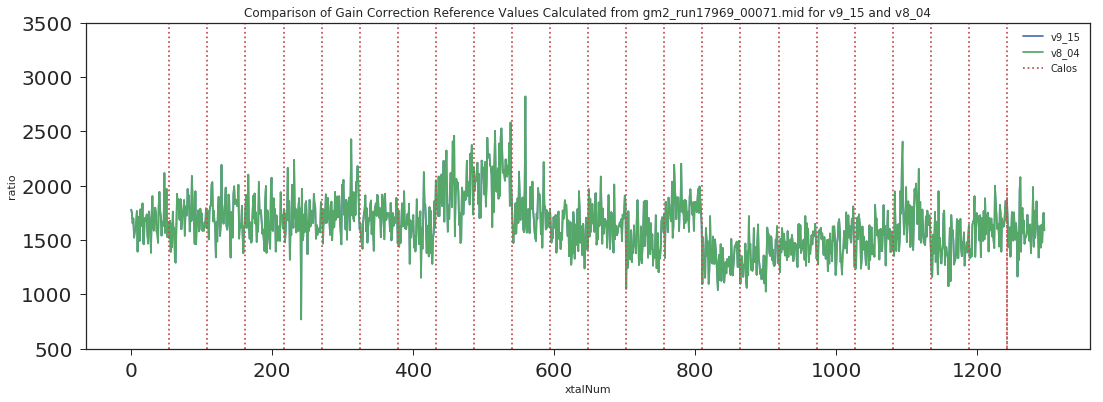

In [134]:
fig, ax = plt.subplots(figsize=(18,6))
plt.title('Comparison of Gain Correction Reference Values Calculated from gm2_run17969_00071.mid for v9_15 and v8_04')
plt.xlabel('xtalNum')
plt.ylabel('ratio')
plt.plot(xtalNumGlobal, refs, label='v9_15')
plt.plot(xtalNumGlobal, refs8, label='v8_04')
for i in range(1,24):
    plt.plot([i*54,i*54],[500,3500],'r:')
plt.plot([i*54,i*54],[0.5,2000],'r:',label='Calos')
plt.legend()
plt.ylim(500,3500)
plt.show()

In [135]:
diffref = [refs[i] - refs8[i] for i in range(len(refs))]
percentdiffref = []
for i in range(len(refs)):
    percentdiffref.append(diffref[i]/(refs8[i])*100.)

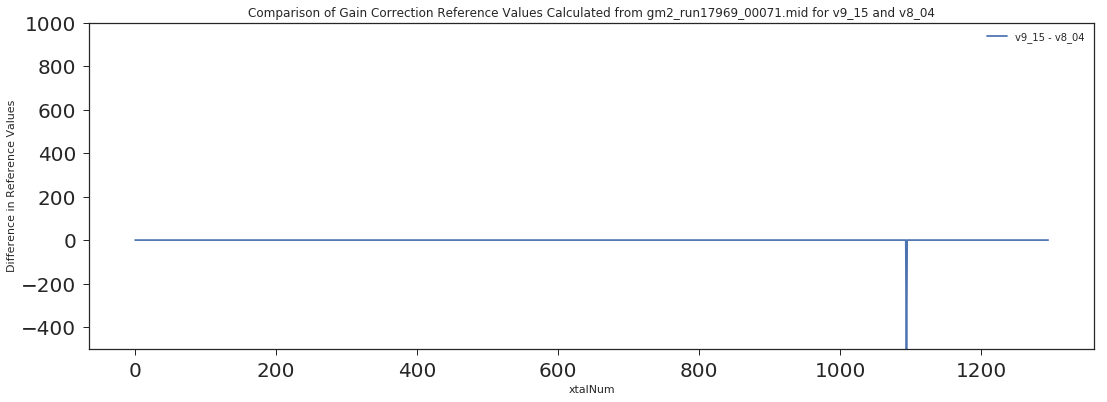

In [136]:
fig, ax = plt.subplots(figsize=(18,6))
plt.title('Comparison of Gain Correction Reference Values Calculated from gm2_run17969_00071.mid for v9_15 and v8_04')
plt.xlabel('xtalNum')
plt.ylabel('Difference in Reference Values')
plt.plot(xtalNumGlobal, diffref, label='v9_15 - v8_04')
#for i in range(1,24):
#    plt.plot([i*54,i*54],[500,3500],'r:')
#plt.plot([i*54,i*54],[0.5,2000],'r:',label='Calos')
plt.legend()
plt.ylim(-500,1000)
plt.show()

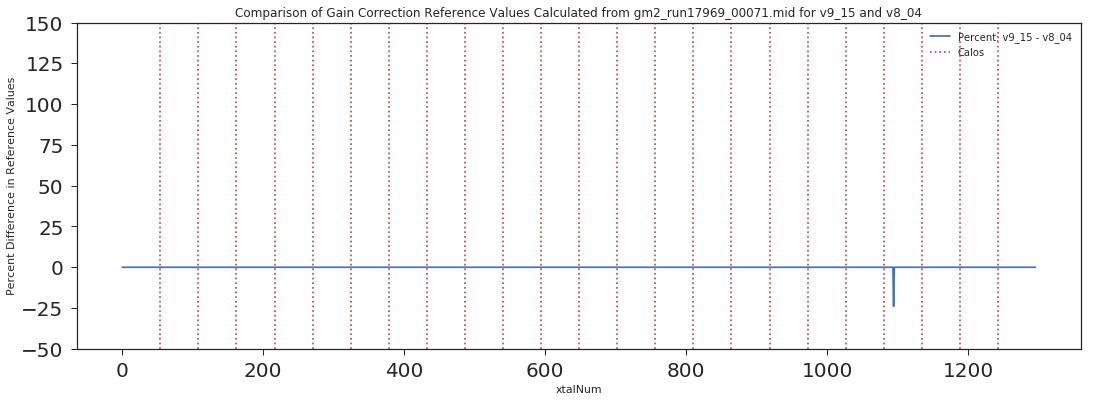

In [137]:
fig, ax = plt.subplots(figsize=(18,6))
plt.title('Comparison of Gain Correction Reference Values Calculated from gm2_run17969_00071.mid for v9_15 and v8_04')
plt.xlabel('xtalNum')
plt.ylabel('Percent Difference in Reference Values')
plt.plot(xtalNumGlobal, percentdiffref, label='Percent: v9_15 - v8_04')
for i in range(1,24):
    plt.plot([i*54,i*54],[-50,500],'r:')
plt.plot([i*54,i*54],[0.5,0.5],'r:',label='Calos')
plt.legend()
plt.ylim(-50,150)
plt.show()

In [138]:
print(refs[:10])

(1779.57, 1748.02, 1653.81, 1699.04, 1522.43, 1575.62, 1592.17, 1656.61, 1767.09, 1394.47)


In [139]:
print(refs8[:10])

(1779.57, 1748.02, 1653.81, 1699.04, 1522.43, 1575.62, 1592.17, 1656.61, 1767.09, 1394.47)
